task2是在task1的基础上进行特征扩展、合成特征、特征组合、还有特征交叉的，task2的内容紧随其后


以下为task1的内容

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [2]:
#正常显示中文
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#用于抑制第三方警告
warnings.filterwarnings("ignore")

In [4]:
pd.options.display.max_rows = 10   #最大显示10行
data = pd.read_csv(r"D:\datasets\data.csv",encoding = "gbk")  #读取数据  

data.info()  #显示数据的详细信息，有没有空行等。

print()
print("Number of datasets: " + str(data.shape[0])+" rows")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 90 columns):
Unnamed: 0                                    4754 non-null int64
custid                                        4754 non-null int64
trade_no                                      4754 non-null object
bank_card_no                                  4754 non-null object
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility

In [5]:
#查看某一行有多少正常值
for i,name in enumerate(data.columns):
    name_sum = data[name].value_counts().shape[0]
    print("{:2}、{:40}     The number of types of features is: {}".format(i+1,name,name_sum))

 1、Unnamed: 0                                   The number of types of features is: 4754
 2、custid                                       The number of types of features is: 4754
 3、trade_no                                     The number of types of features is: 4754
 4、bank_card_no                                 The number of types of features is: 1
 5、low_volume_percent                           The number of types of features is: 40
 6、middle_volume_percent                        The number of types of features is: 90
 7、take_amount_in_later_12_month_highest        The number of types of features is: 166
 8、trans_amount_increase_rate_lately            The number of types of features is: 782
 9、trans_activity_month                         The number of types of features is: 84
10、trans_activity_day                           The number of types of features is: 512
11、transd_mcc                                   The number of types of features is: 41
12、trans_days_interval_filter      

In [6]:
data.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [7]:
#将空值替换为np.nan
for columns in data.columns:
    data.loc[data[columns] == "NA",columns] = np.nan   

In [8]:
#删除无效特征
Irrelevant_features = ['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name', 'latest_query_time','loans_latest_time']
data = data.drop(Irrelevant_features,axis = 1)

In [9]:
#查看数据类型
pd.options.display.max_rows = 82   #显示所有行数
data.dtypes 

low_volume_percent                            float64
middle_volume_percent                         float64
take_amount_in_later_12_month_highest         float64
trans_amount_increase_rate_lately             float64
trans_activity_month                          float64
trans_activity_day                            float64
transd_mcc                                    float64
trans_days_interval_filter                    float64
trans_days_interval                           float64
regional_mobility                             float64
student_feature                               float64
repayment_capability                          float64
is_high_user                                  float64
number_of_trans_from_2011                     float64
first_transaction_time                        float64
historical_trans_amount                       float64
historical_trans_day                          float64
rank_trad_1_month                             float64
trans_amount_3_month        

In [10]:
#对reg_preference_for_trad特征进行替换
print(data["reg_preference_for_trad"].unique())
reg_preference_for_trad = {"一线城市":1,"二线城市":2,"三线城市":3,"境外":4,"其他城市":5}
#采用列表生成式对特征进行转换
#data["reg_preference_for_trad"] = [reg_preference_for_trad[x] for x in data["reg_preference_for_trad"] if x!= np.nan]
for i in range(0,data.shape[0]):
    if data["reg_preference_for_trad"][i] == "一线城市":
        data["reg_preference_for_trad"][i] = reg_preference_for_trad[data["reg_preference_for_trad"][i]]
    elif data["reg_preference_for_trad"][i] == "二线城市":
        data["reg_preference_for_trad"][i] = reg_preference_for_trad[data["reg_preference_for_trad"][i]]
    elif data["reg_preference_for_trad"][i] == "三线城市":
        data["reg_preference_for_trad"][i] = reg_preference_for_trad[data["reg_preference_for_trad"][i]]
    elif data["reg_preference_for_trad"][i] == "境外":
        data["reg_preference_for_trad"][i] = reg_preference_for_trad[data["reg_preference_for_trad"][i]]
    elif data["reg_preference_for_trad"][i] == "其他城市":
        data["reg_preference_for_trad"][i] = reg_preference_for_trad[data["reg_preference_for_trad"][i]]

['一线城市' '三线城市' '境外' '二线城市' '其他城市' nan]


In [11]:
#转换数据类型
#for columns in data.columns:
#   data[columns] = pd.to_numeric(data[columns])
data = data.convert_objects(convert_numeric = True)
data.dtypes

low_volume_percent                            float64
middle_volume_percent                         float64
take_amount_in_later_12_month_highest         float64
trans_amount_increase_rate_lately             float64
trans_activity_month                          float64
trans_activity_day                            float64
transd_mcc                                    float64
trans_days_interval_filter                    float64
trans_days_interval                           float64
regional_mobility                             float64
student_feature                               float64
repayment_capability                          float64
is_high_user                                  float64
number_of_trans_from_2011                     float64
first_transaction_time                        float64
historical_trans_amount                       float64
historical_trans_day                          float64
rank_trad_1_month                             float64
trans_amount_3_month        

In [12]:
#在指定阈值的前提下对特征进行删除 
data = data.dropna(axis = 1,thresh = 1000)
data = data.dropna(axis = 0,thresh = 75)
data.shape

(4423, 82)

In [13]:
data = data.fillna(data.mean())
data

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,0.01,0.99,0.0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,0.02,0.94,2000.0,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,0.04,0.96,0.0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,0.00,0.96,2000.0,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,0.01,0.99,0.0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0
5,0.02,0.98,2000.0,7.59,1.00,0.733,27.0,8.0,11.0,3.0,...,5300.0,1941.0,11200.0,80.0,10.0,12.0,20400.0,8130.0,3.0,4.0
6,0.02,0.98,0.0,23.67,0.94,0.087,10.0,54.0,53.0,2.0,...,2200.0,2200.0,7600.0,73.0,2.0,2.0,16800.0,8900.0,1.0,3.0
8,0.03,0.65,0.0,0.31,0.76,0.472,15.0,21.0,14.0,2.0,...,5300.0,4750.0,5500.0,79.0,8.0,11.0,19200.0,7987.0,24.0,7.0
9,0.01,0.99,500.0,0.80,1.00,0.088,15.0,36.0,35.0,2.0,...,2800.0,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,142.0
10,0.01,0.99,0.0,2.48,0.94,0.322,16.0,29.0,21.0,2.0,...,1800.0,1325.0,9900.0,80.0,7.0,8.0,20400.0,7757.0,12.0,9.0


以下为Task2的任务部分，
1 特征衍生
特征衍生也称特征构建，是指从原始数据中构建新的特征，属于特征选择的一种手段。

经过数据分析及数据预处理后得到基础特征后，一般可以采用如下几种方式进行特征衍生：

特征拓展

合成特征

特征组合

特征交叉

其中特征交叉属于特征组合的一个子集


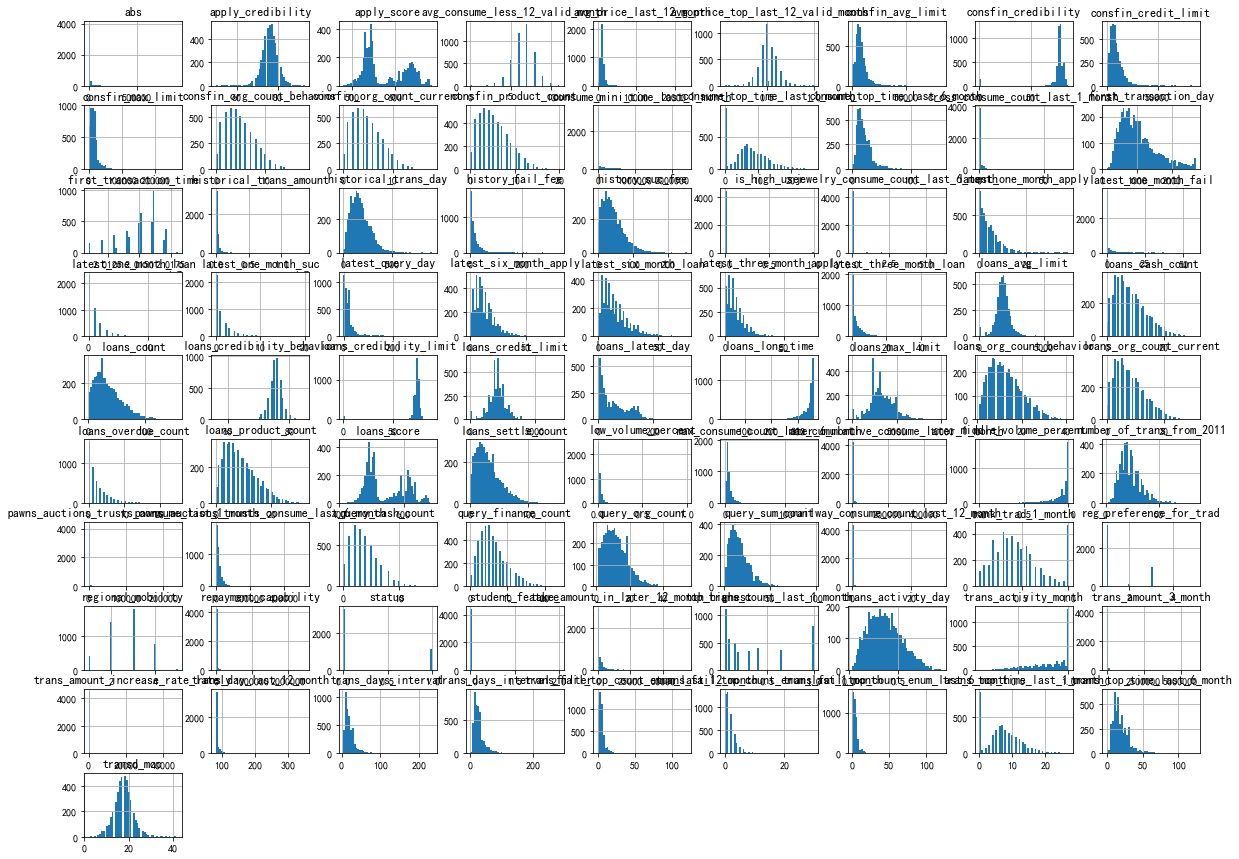

In [18]:
#画出每个属性的柱状图
data.hist(bins=50,figsize = (20,15))
plt.show()

In [21]:
#创建数据集切分函数
def split_train_test_split(data,test_size):
    shuffled_indices = np.random.permutation(len(data))
    train_indices = int(test_size*len(data))
    train_set = data.iloc[shuffled_indices[:train_indices]]
    test_set = data.iloc[shuffled_indices[train_indices:]]
    return train_set,test_set

In [24]:
#已删除的无效特征有
Irrelevant_features = ['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name', 'latest_query_time','loans_latest_time']
#查看特征之间的相关系数
data.corr()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
low_volume_percent,1.000000,-0.126646,-0.067968,0.006158,0.027589,-0.096382,-0.086401,0.035326,0.056828,-0.053093,...,-0.144774,-0.130922,-0.085542,-0.015530,-0.083101,-0.076576,-0.099386,-0.095205,0.075513,0.046709
middle_volume_percent,-0.126646,1.000000,-0.141680,0.001453,-0.030089,-0.070650,-0.122351,0.019175,0.027606,0.002181,...,-0.154338,-0.114209,-0.159525,-0.001526,-0.011021,-0.018200,-0.175952,-0.180420,0.002265,-0.000892
take_amount_in_later_12_month_highest,-0.067968,-0.141680,1.000000,-0.007106,0.058759,0.108205,0.179440,-0.052489,-0.050864,0.023658,...,0.070935,0.037059,0.039345,0.017166,0.020577,0.020567,0.054169,0.040955,-0.000645,-0.008924
trans_amount_increase_rate_lately,0.006158,0.001453,-0.007106,1.000000,0.016141,-0.003351,-0.012409,0.013731,0.000651,-0.027978,...,0.007104,0.000085,0.029250,0.006165,-0.020114,-0.019808,0.007144,0.041122,-0.001431,0.027479
trans_activity_month,0.027589,-0.030089,0.058759,0.016141,1.000000,0.062661,0.072670,-0.090456,-0.157870,-0.221135,...,0.060671,0.037009,-0.038235,0.002042,0.002512,0.004721,-0.023425,-0.045153,-0.024939,-0.015068
trans_activity_day,-0.096382,-0.070650,0.108205,-0.003351,0.062661,1.000000,0.667673,-0.488891,-0.540914,0.138220,...,0.443322,0.199048,0.094763,0.176844,0.550247,0.548017,0.222573,0.083180,-0.184860,-0.295161
transd_mcc,-0.086401,-0.122351,0.179440,-0.012409,0.072670,0.667673,1.000000,-0.402824,-0.436559,0.106108,...,0.308262,0.159612,0.064452,0.127764,0.366816,0.370521,0.154661,0.056003,-0.113083,-0.205212
trans_days_interval_filter,0.035326,0.019175,-0.052489,0.013731,-0.090456,-0.488891,-0.402824,1.000000,0.691008,-0.124163,...,-0.219819,-0.114047,-0.051912,-0.136070,-0.285098,-0.284484,-0.108538,-0.042404,0.065477,0.158527
trans_days_interval,0.056828,0.027606,-0.050864,0.000651,-0.157870,-0.540914,-0.436559,0.691008,1.000000,-0.133962,...,-0.267788,-0.155742,-0.032643,-0.100562,-0.284138,-0.285338,-0.102425,-0.022832,0.096312,0.173233
regional_mobility,-0.053093,0.002181,0.023658,-0.027978,-0.221135,0.138220,0.106108,-0.124163,-0.133962,1.000000,...,0.097330,0.060009,0.089907,0.053748,0.145790,0.143937,0.088699,0.077166,-0.051381,-0.102949


In [50]:
labels = data["status"].copy()
#查看标签与其他特征之间的相关性
data.corr()["status"].sort_values(ascending = False)

status                                        1.000000
trans_fail_top_count_enum_last_1_month        0.331327
history_fail_fee                              0.320190
loans_overdue_count                           0.279361
latest_one_month_fail                         0.258408
rank_trad_1_month                             0.148711
trans_fail_top_count_enum_last_6_month        0.130405
top_trans_count_last_1_month                  0.117512
trans_fail_top_count_enum_last_12_month       0.115006
trans_day_last_12_month                       0.079754
avg_price_top_last_12_valid_month             0.071365
low_volume_percent                            0.063484
latest_six_month_loan                         0.062865
latest_query_day                              0.060243
query_cash_count                              0.054300
latest_three_month_loan                       0.053741
loans_count                                   0.048324
first_transaction_time                        0.041506
middle_vol

In [54]:
from sklearn.feature_selection import VarianceThreshold
t = 4
vt = VarianceThreshold(threshold = t)
vt.fit_transform(data)
vt.variances_

array([1.45896701e-03, 1.97881165e-02, 1.60434788e+07, 5.17488356e+05,
       3.86710277e-02, 2.88897766e-02, 1.97675309e+01, 5.12218325e+02,
       2.63688081e+02, 7.92255495e-01, 4.51633678e-04, 2.80550017e+09,
       1.09557214e-02, 1.00453094e+02, 2.20152271e+08, 1.06109243e+11,
       9.94051731e+03, 6.87134784e-02, 1.07590618e+10, 1.86457529e+00,
       7.58212480e+08, 1.21489740e-01, 5.64519184e+05, 9.68638113e-03,
       8.84520104e-01, 2.82609511e+01, 1.65587589e+02, 2.98369817e+01,
       1.72248497e+02, 5.26927436e+00, 3.68902485e+00, 2.04213002e+01,
       2.29798705e+01, 1.35873634e+11, 1.24059550e+08, 3.30159213e+01,
       2.44051099e-01, 4.58470218e+07, 8.09759896e+08, 4.34059211e-02,
       1.88316893e-01, 2.89902398e+05, 3.31679774e+02, 2.60349030e+03,
       1.72617760e+01, 4.95091464e+01, 1.44829113e+01, 6.74733421e+00,
       1.27662300e+02, 2.05237874e+01, 5.81903696e+01, 8.60941835e+01,
       3.71450230e+03, 4.95047730e+00, 6.04223639e+02, 4.69264102e+02,
      

In [57]:
Variances = {}
for i,j in zip(data.columns,vt.variances_):
    Variances[i]=j
for key,value in Variances.items():
    print(key+":"+str(value))

low_volume_percent:0.001458967008467904
middle_volume_percent:0.019788116472742905
take_amount_in_later_12_month_highest:16043478.840995641
trans_amount_increase_rate_lately:517488.3558825499
trans_activity_month:0.03867102772800535
trans_activity_day:0.028889776555954375
transd_mcc:19.767530925456
trans_days_interval_filter:512.2183247713059
trans_days_interval:263.68808137063724
regional_mobility:0.7922554950743828
student_feature:0.00045163367795065737
repayment_capability:2805500171.772427
is_high_user:0.010955721405521639
number_of_trans_from_2011:100.4530943193629
first_transaction_time:220152270.9602655
historical_trans_amount:106109243028.29704
historical_trans_day:9940.517308425544
rank_trad_1_month:0.06871347843669012
trans_amount_3_month:10759061759.925457
avg_consume_less_12_valid_month:1.8645752893137832
abs:758212479.6405896
top_trans_count_last_1_month:0.12148973985439503
avg_price_last_12_month:564519.1840853688
avg_price_top_last_12_valid_month:0.00968638113075729
reg_

In [67]:
sorted(list(sorted(Variances.items(),key = lambda x:x[1])),reverse = True)

[('transd_mcc', 19.767530925456),
 ('trans_top_time_last_6_month', 165.58758875013038),
 ('trans_top_time_last_1_month', 28.260951108088157),
 ('trans_fail_top_count_enum_last_6_month', 20.421300171285637),
 ('trans_fail_top_count_enum_last_1_month', 3.689024851028662),
 ('trans_fail_top_count_enum_last_12_month', 22.979870528360564),
 ('trans_days_interval_filter', 512.2183247713059),
 ('trans_days_interval', 263.68808137063724),
 ('trans_day_last_12_month', 331.6797741278926),
 ('trans_amount_increase_rate_lately', 517488.3558825499),
 ('trans_amount_3_month', 10759061759.925457),
 ('trans_activity_month', 0.03867102772800535),
 ('trans_activity_day', 0.028889776555954375),
 ('top_trans_count_last_1_month', 0.12148973985439503),
 ('take_amount_in_later_12_month_highest', 16043478.840995641),
 ('student_feature', 0.00045163367795065737),
 ('status', 0.18831689262891052),
 ('repayment_capability', 2805500171.772427),
 ('regional_mobility', 0.7922554950743828),
 ('reg_preference_for_tra

In [55]:
data.columns

Index(['low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
      

In [82]:
#内容不是很明白   来自https://github.com/Yeoninm/Data-Mining/blob/master/Task2.ipynb  学习ing 
#原代码中有两处错误  函数woe_single_x中sum(y == event)和sum(y == event)错误，已修改。
import math
import numpy as np
from scipy import stats
from sklearn.utils.multiclass import type_of_target

def woe(X, y, event=1):  
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        # 1) 连续特征离散化
        if type_of_target(x) == 'continuous':
            x = discrete(x)
        # 2) 计算该特征的woe和iv
        # woe_dict, iv = woe_single_x(x, y, feature, event)
        woe_dict, iv = woe_single_x(x, y, feature, event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict) 
        
    return iv_dict
        
def discrete(x):
    # 使用5等分离散化特征
    res = np.zeros(x.shape)
    for i in range(5):
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = i + 1    # 将[i, i+1]块内的值标记成i+1
    return res

def woe_single_x(x, y, feature,event = 1):
    # event代表预测正例的标签
    event_total = np.sum(np.array(y == event).astype(int))
    non_event_total = y.shape[-1] - event_total
    
    iv = 0
    woe_dict = {}
    for x1 in set(x):    # 遍历各个块
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = np.sum(np.array(y1 == event).astype(int))
        non_event_count = y1.shape[-1] - event_count
        rate_event = event_count / event_total    
        rate_non_event = non_event_count / non_event_total
        
        if rate_event == 0:
            rate_event = 0.0001
            # woei = -20
        elif rate_non_event == 0:
            rate_non_event = 0.0001
            # woei = 20
        woei = math.log(rate_event / rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv

In [72]:
y = data.copy()

(4423, 81)

In [83]:
X_train,X_text,y_train,y_test = train_test_split(data,labels,test_size = 0.3,random_state = 2018)
iv_dict = woe(X_train, y_train)


In [84]:
iv = sorted(iv_dict.items(), key = lambda x:x[1],reverse = True)
iv

[('historical_trans_amount', 2.757861445700947),
 ('trans_amount_3_month', 2.6037576084485847),
 ('repayment_capability', 2.3937750255275754),
 ('pawns_auctions_trusts_consume_last_6_month', 2.35882799700062),
 ('first_transaction_day', 2.26374750388958),
 ('first_transaction_time', 2.263747503889555),
 ('abs', 2.179433881909233),
 ('consfin_avg_limit', 1.804285340571574),
 ('loans_avg_limit', 1.760941280421248),
 ('max_cumulative_consume_later_1_month', 1.4885299059422175),
 ('historical_trans_day', 1.4711138012078535),
 ('pawns_auctions_trusts_consume_last_1_month', 0.9656543232633502),
 ('loans_latest_day', 0.9447908923730582),
 ('avg_price_last_12_month', 0.8875947171418925),
 ('loans_score', 0.8084597233390751),
 ('consfin_credit_limit', 0.7938953560977791),
 ('apply_score', 0.7536447564252721),
 ('consfin_max_limit', 0.656502760851913),
 ('history_suc_fee', 0.6298835448947876),
 ('loans_long_time', 0.6081407612839412),
 ('loans_count', 0.5802160014912622),
 ('take_amount_in_later

In [78]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(oob_score=True,random_state = 2018)
rfc.fit(X_train,y_train)
print(rfc.oob_score_)

0.750968992248062
